In [1]:
from synth_dim_model import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pylab as plb
plb.rcParams['font.size'] = 12

In [22]:
N = 3 # real sites
M = 10 # synthetic sites per site

In [23]:
lower_J_V_ratio_bound = 0
upper_J_V_ratio_bound = 10
V = 1

J_V_ratios = np.linspace(lower_J_V_ratio_bound, upper_J_V_ratio_bound, 100)

all_eigenvalues = []
for J_V_ratio in J_V_ratios:
    J = J_V_ratio * V
    instantenous_hamiltonian = construct_hamiltonian(N, M, J, V)
    temp_instantenous_eigenvalues, _ = exact_diagonalize(instantenous_hamiltonian)
    all_eigenvalues.append(temp_instantenous_eigenvalues)
    
all_eigenvalues = np.array(all_eigenvalues)

energy_diff = all_eigenvalues - all_eigenvalues[:, [0]]

C:\Users\Joe\AppData\Local\Temp\ipykernel_34068\1286412216.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("gist_rainbow", n_states)


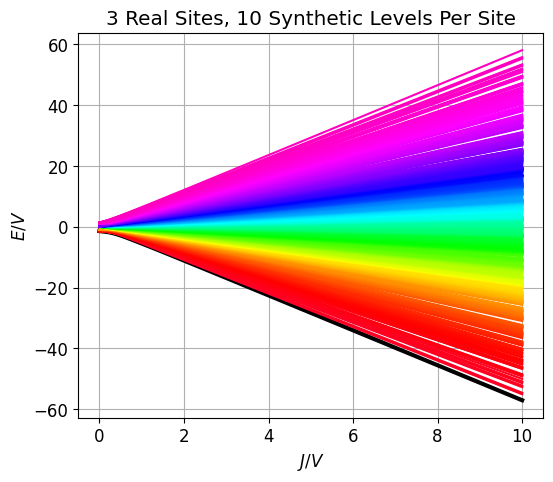

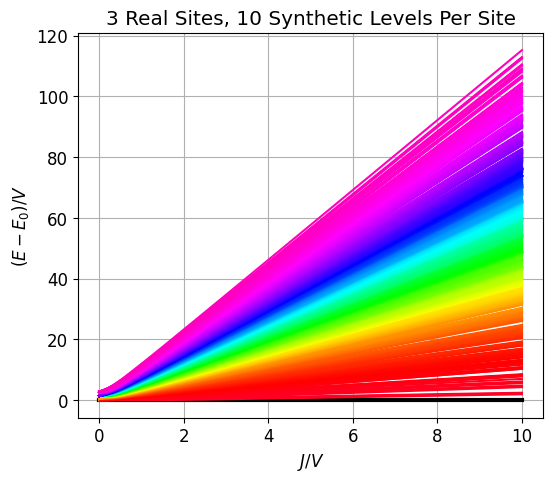

In [24]:
n_states = M**N
cmap = get_cmap("gist_rainbow", n_states)

fig, ax = plt.subplots(figsize = (6,5))
for i in range(n_states):
    color = cmap(i)
    
    if i == 0:
        ax.plot(J_V_ratios, all_eigenvalues[:,i], "-", color = "k", linewidth = 3)
        
    else:
        ax.plot(J_V_ratios, all_eigenvalues[:,i], "-", color = color)
    
ax.set_title(f"{N} Real Sites, {M} Synthetic Levels Per Site")
ax.set_ylabel("$E$/$V$")
ax.set_xlabel("$J$/$V$")
ax.grid()

fig, ax = plt.subplots(figsize = (6,5))
for i in range(n_states):
    color = cmap(i)
    
    if i == 0:
        ax.plot(J_V_ratios, energy_diff[:,i], color = "k", linewidth = 3)
    else:
        ax.plot(J_V_ratios, energy_diff[:,i], color = color)
    
ax.set_title(f"{N} Real Sites, {M} Synthetic Levels Per Site")
ax.set_ylabel("$(E-E_0)$/$V$")
ax.set_xlabel("$J$/$V$")
ax.grid()

Ground State Degeneracy = 34


C:\Users\Joe\AppData\Local\Temp\ipykernel_34068\3515719014.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = get_cmap("gist_rainbow", deg_counter)


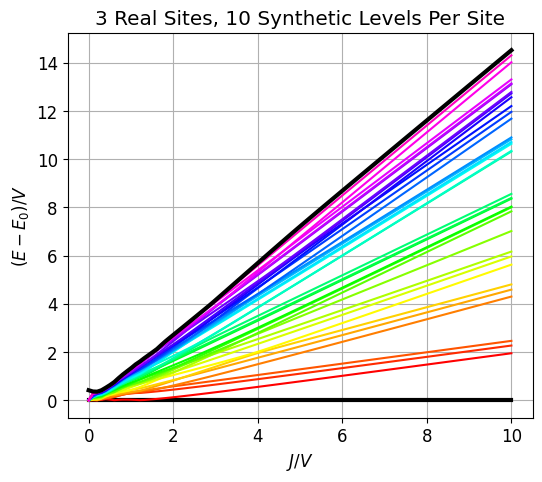

In [25]:
threshold = 1e-5

all_eigenvalues = np.array(all_eigenvalues)

deg_counter = 0
for i in range(len(all_eigenvalues[0])):  # Changed to iterate over states, not J/V ratios
    eigenvalues = all_eigenvalues[:, i] - all_eigenvalues[:, 0]  # Compare to ground state
    is_close_to_zero = eigenvalues[0] < threshold
    if is_close_to_zero:
        deg_counter += 1

print(f"Ground State Degeneracy = {deg_counter}")

fig, ax = plt.subplots(figsize=(6, 5))
cmap2 = get_cmap("gist_rainbow", deg_counter)

for i in range(deg_counter + 1):
    color = cmap2(i)
    
    if i == 0 or i == deg_counter:
        ax.plot(J_V_ratios, energy_diff[:, i], color="k", linewidth=3)  
        
    else:
        ax.plot(J_V_ratios, energy_diff[:, i], color=color)
    
ax.set_title(f"{N} Real Sites, {M} Synthetic Levels Per Site")
ax.set_ylabel("$(E-E_0)$/$V$")
ax.set_xlabel("$J$/$V$")
ax.grid()

C:\Users\Joe\AppData\Local\Temp\ipykernel_34068\3603921622.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = get_cmap("gist_rainbow", deg_counter)


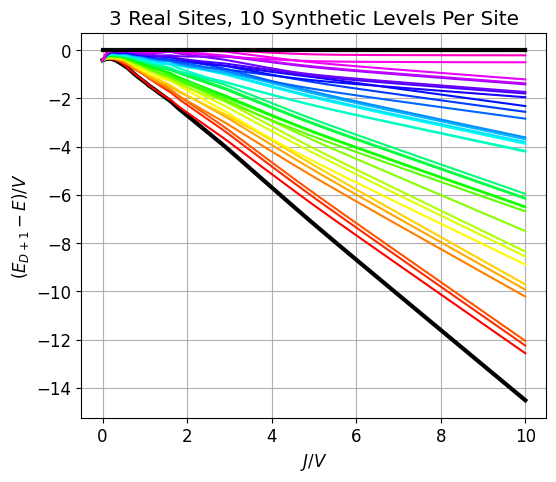

In [26]:
diverge_energy_diff = all_eigenvalues - all_eigenvalues[:, [deg_counter]]

fig, ax = plt.subplots(figsize=(6, 5))
cmap2 = get_cmap("gist_rainbow", deg_counter)


for i in range(deg_counter+1):
    color = cmap2(i)
    
    if i == 0 or i == deg_counter:
        ax.plot(J_V_ratios, diverge_energy_diff[:, i], color="k", linewidth=3)  
        
    else:
        ax.plot(J_V_ratios, diverge_energy_diff[:, i], color=color)
    
ax.set_title(f"{N} Real Sites, {M} Synthetic Levels Per Site")
ax.set_ylabel("$(E_{D+1}-E)$/$V$")
ax.set_xlabel("$J$/$V$")
#ax.set_ylim(-0.8,0.1)
#ax.set_xlim(0,1)
ax.grid()